# Data Analysis - e-commerce

### DataSet

Online store clients behavior - Dataset available on (https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store).

The dataset used is the one relative to October 2019

In [315]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.float_format = "{:,.2f}".format;

## Import the data


In [316]:
df = pd.read_csv('2019-Oct.csv')

In [317]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,"1,081.98",535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


## Explore dataset

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [319]:
df.shape
print(f'{df.shape[0]} columns and {df.shape[1]} rows')

42448764 columns and 9 rows


In [320]:
# Null values
null_values = df.isnull().sum()
print(null_values)

print(f'Total number of null values: {null_values.sum()}')

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64
Total number of null values: 19632691


In [321]:
#Null Values percentages
print(df.isna().mean())

event_time      0.00
event_type      0.00
product_id      0.00
category_id     0.00
category_code   0.32
brand           0.14
price           0.00
user_id         0.00
user_session    0.00
dtype: float64


In [15]:
# Data types
print(df.dtypes)

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object


In [323]:
# Statistics on all numerical variables
print(df.describe().transpose())

                    count                         mean  \
product_id  42,448,764.00                10,549,932.38   
category_id 42,448,764.00 2,057,404,238,504,413,952.00   
price       42,448,764.00                       290.32   
user_id     42,448,764.00               533,537,147.51   

                                  std                          min  \
product_id              11,881,906.97                 1,000,978.00   
category_id 18,439,264,662,054,096.00 2,053,013,552,226,107,648.00   
price                          358.27                         0.00   
user_id                 18,523,738.17                33,869,381.00   

                                     25%                          50%  \
product_id                  1,005,157.00                 5,000,470.00   
category_id 2,053,013,555,464,110,592.00 2,053,013,555,631,882,752.00   
price                              65.98                       162.93   
user_id                   515,904,318.00               529,696,452

In [324]:
# Convert data types to have only "price" as numerical
df = df.astype({"event_type": 'category', 
                "product_id": 'category',
                "category_id": 'category', 
                "category_code": 'category', 
                "brand": 'category',
                "user_id": 'category', 
                "user_session": 'category'
})

In [325]:
# Check the tipologies of events
df['event_type'].unique()

['view', 'purchase', 'cart']
Categories (3, object): ['view', 'purchase', 'cart']

In [326]:
# Tranform event_time into datetime, and remove the '+00' (there are no time zone differences)
df['event_time'] = pd.to_datetime(df['event_time']).dt.tz_convert(None)

In [327]:
# Check data types again
print(df.dtypes)

event_time       datetime64[ns]
event_type             category
product_id             category
category_id            category
category_code          category
brand                  category
price                   float64
user_id                category
user_session           category
dtype: object


In [328]:
# Now we only get statistics for the price
print(df.describe().transpose())

              count   mean    std  min   25%    50%    75%      max
price 42,448,764.00 290.32 358.27 0.00 65.98 162.93 358.57 2,574.07


In [329]:
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8


### Events type

In [330]:
# Check how many records there are per each event_type
df.groupby("event_type")["event_type"].count().sort_values(ascending=False)

event_type
view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64

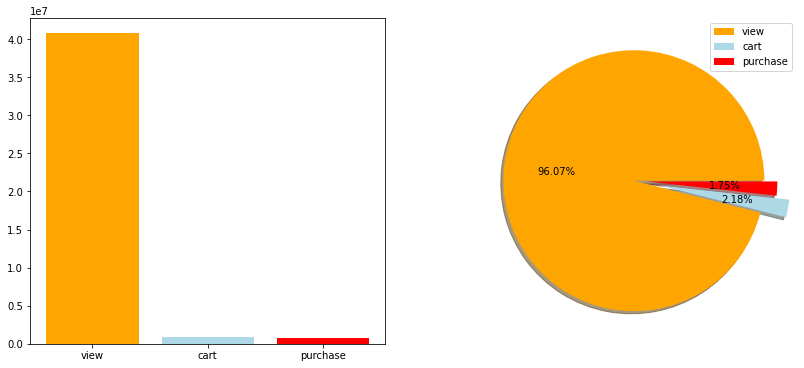

In [331]:
colors = ['orange', 'lightblue','red']
explode = [0, 0.2,0.1]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax[0].bar(df["event_type"].value_counts().index,df["event_type"].value_counts().values,color = colors)
ax[1].pie(df["event_type"].value_counts().values, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
ax[1].legend(df["event_type"].value_counts().index)
plt.show()

### Categories

In [332]:
#Considering how categories and subcategories are expressed in the original dataset (separated by a point), 
#I define a function to separate the two, when a category is given as an input

def category_extraction (categ, level=0):
    
    output = categ.split('.')[level]
    return output

In [333]:
#Create 2 new columns to split categ. and sub-categ.
df['category'] = df['category_code'].apply(category_extraction, level=0)
df['subcategory'] = df['category_code'].apply(category_extraction, level=1)

#Extract some new information from the original dataset
Total_rows = df.shape[0]
print('Total number of rows:{:,.0f}'.format(Total_rows))
print('-'*50)
Total_visits = df['user_session'].nunique()
print('Total number of visits:{:,.0f}'.format(Total_visits))
print('-'*50)
Total_visitors = df['user_id'].nunique()
print('Total number of visitors:{:,.0f}'.format(Total_visitors))
print('-'*50)
Total_categories = df['category'].nunique()
print('Total number of categories:{:,.0f}'.format(Total_categories))
print('-'*50)
Total_subcategories = df['subcategory'].nunique()
print('Total number of subcategories:{:,.0f}'.format(Total_subcategories))
print('-'*50)
Total_brands = df['brand'].nunique()
print('Total number of brands:{:,.0f}'.format(Total_brands))
print('-'*50)
Total_products = df['product_id'].nunique()
print('Total number of products:{:,.0f}'.format(Total_products))

Total number of rows:42,448,764
--------------------------------------------------
Total number of visits:9,244,421
--------------------------------------------------
Total number of visitors:3,022,290
--------------------------------------------------
Total number of categories:13
--------------------------------------------------
Total number of subcategories:57
--------------------------------------------------
Total number of brands:3,444
--------------------------------------------------
Total number of products:166,794


In [334]:
#At this point we can drop the category_code column
df = df.drop(columns=['category_code'])

## Analysis

#### Analyse daily activity

In [335]:
# Daily visits

daily_table = df.groupby(
    by=[df['event_time'].dt.normalize()]).agg(             #dt.normalize in order to take away the time, and be left with day
    daily_visits=('user_session', lambda x: x.nunique()),  #Add 2 new columns to count non-null and unique user sessions and id
    daily_visitors=('user_id', lambda x: x.nunique())
)

# Daily sales
sales_filter = df['event_type'] == 'purchase'                                        #Consider only purchase events
sales = df.loc[sales_filter].groupby(by=[df['event_time'].dt.normalize()]).agg(
    number_daily_sales=('event_type', 'count'),
    total_daily_sales=('price', 'sum')
).reset_index()

# New table
daily_table = pd.merge(left=daily_table,              # put the 2 above tables together
                               right=sales,
                               left_on=['event_time'],
                               right_on=['event_time'],
                               how='left')

daily_table['conversions_percentage'] = daily_table['number_daily_sales'] / daily_table[
    'daily_visits']

In [336]:
daily_table

,event_time,daily_visits,daily_visitors,number_daily_sales,total_daily_sales,conversions_percentage
0,2019-10-01,268737,190188,19307,"6,275,964.01",0.07
1,2019-10-02,261252,184965,19469,"6,213,628.53",0.07
2,2019-10-03,241086,170668,19255,"6,233,782.98",0.08
3,2019-10-04,300651,209410,27041,"8,623,684.47",0.09
4,2019-10-05,276914,194958,23494,"7,341,596.91",0.08
5,2019-10-06,273034,193210,22171,"6,737,660.78",0.08
6,2019-10-07,263437,186951,21378,"6,348,189.06",0.08
7,2019-10-08,308348,221204,23072,"6,819,832.28",0.07
8,2019-10-09,301219,214140,22748,"6,855,511.13",0.08
9,2019-10-10,295142,205321,21993,"6,665,600.86",0.07


In [337]:
#Daily statistics for the visits

Stats = pd.DataFrame(daily_table.groupby(by=daily_table['event_time'].dt.day_name())['daily_visits'].describe())
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #To re-order the days 
Stats.reindex(days)

,count,mean,std,min,25%,50%,75%,max
event_time,,,,,,,,
Monday,4.00,"293,353.00","26,033.15","263,437.00","276,610.00","294,346.50","311,089.50","321,282.00"
Tuesday,5.00,"301,032.40","27,672.77","268,737.00","276,723.00","308,348.00","316,706.00","334,648.00"
Wednesday,5.00,"295,314.60","27,194.96","261,252.00","274,906.00","301,219.00","310,453.00","328,743.00"
Thursday,5.00,"282,820.60","24,557.36","241,086.00","281,446.00","293,587.00","295,142.00","302,842.00"
Friday,4.00,"321,772.50","16,017.26","300,651.00","313,704.00","325,731.00","333,799.50","334,977.00"
Saturday,4.00,"298,041.75","19,140.22","276,914.00","286,412.75","296,976.50","308,605.50","321,300.00"
Sunday,4.00,"309,080.00","32,756.35","273,034.00","285,634.75","311,671.50","335,116.75","339,943.00"


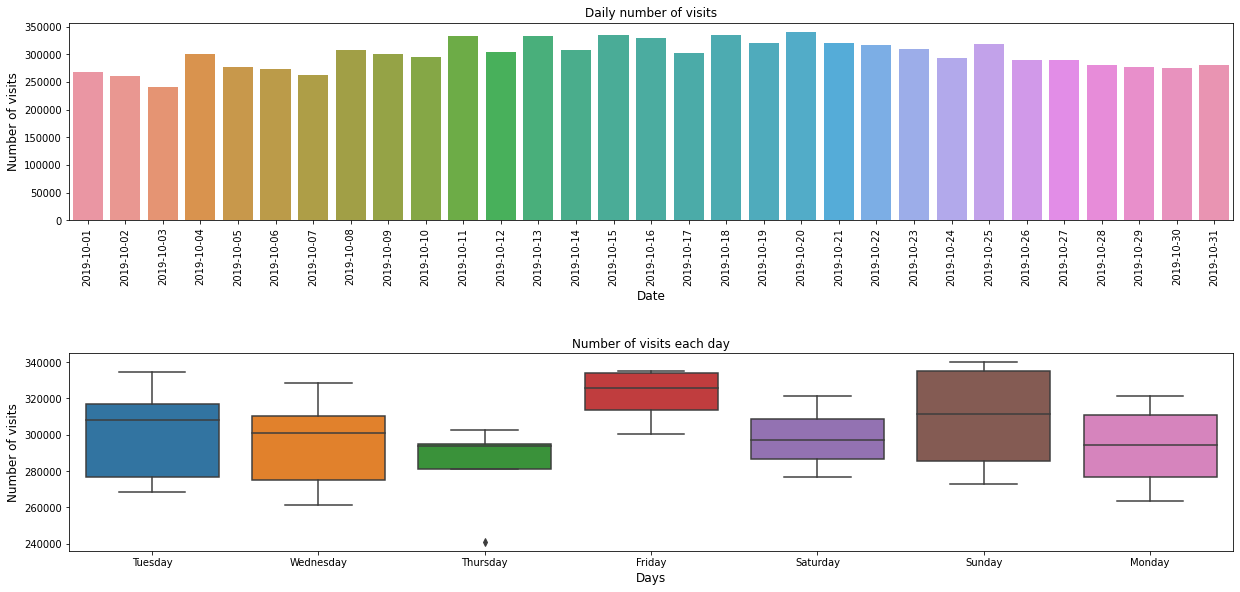

In [338]:
#Plot daily visits

fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(2, 1, 1)
sns.barplot(x=daily_table['event_time'].dt.date, y='daily_visits', data=daily_table, ax=ax1)
plt.xticks(rotation=90)
plt.title('Daily number of visits',fontsize=12)
plt.ylabel('Number of visits',fontsize=12)
plt.xlabel('Date',fontsize=12)

ax2 = fig.add_subplot(2, 1, 2)
sns.boxplot(x=daily_table['event_time'].dt.day_name(), y='daily_visits', data=daily_table, ax=ax2)
plt.title('Number of visits each day',fontsize=12)
plt.ylabel('Number of visits',fontsize=12)
plt.xlabel('Days',fontsize=12)
fig.tight_layout(pad=3.5)

In [339]:
#Daily statistics for the visitors

Stats = pd.DataFrame(daily_table.groupby(by=daily_table['event_time'].dt.day_name())['daily_visitors'].describe())
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #to re-order the days 
Stats.reindex(days)

,count,mean,std,min,25%,50%,75%,max
event_time,,,,,,,,
Monday,4.00,"204,218.00","16,732.50","186,951.00","193,410.00","202,326.00","213,134.00","225,269.00"
Tuesday,5.00,"211,615.80","18,526.04","190,188.00","193,168.00","221,204.00","223,384.00","230,135.00"
Wednesday,5.00,"208,073.80","18,982.96","184,965.00","191,965.00","214,140.00","219,100.00","230,199.00"
Thursday,5.00,"197,994.80","15,736.89","170,668.00","198,571.00","205,321.00","206,937.00","208,477.00"
Friday,4.00,"223,166.00","9,715.30","209,410.00","219,796.00","226,360.50","229,730.50","230,533.00"
Saturday,4.00,"205,851.25","9,731.79","194,958.00","200,368.50","205,263.50","210,746.25","217,920.00"
Sunday,4.00,"213,090.00","18,707.44","193,210.00","199,321.75","213,650.50","227,418.75","231,849.00"


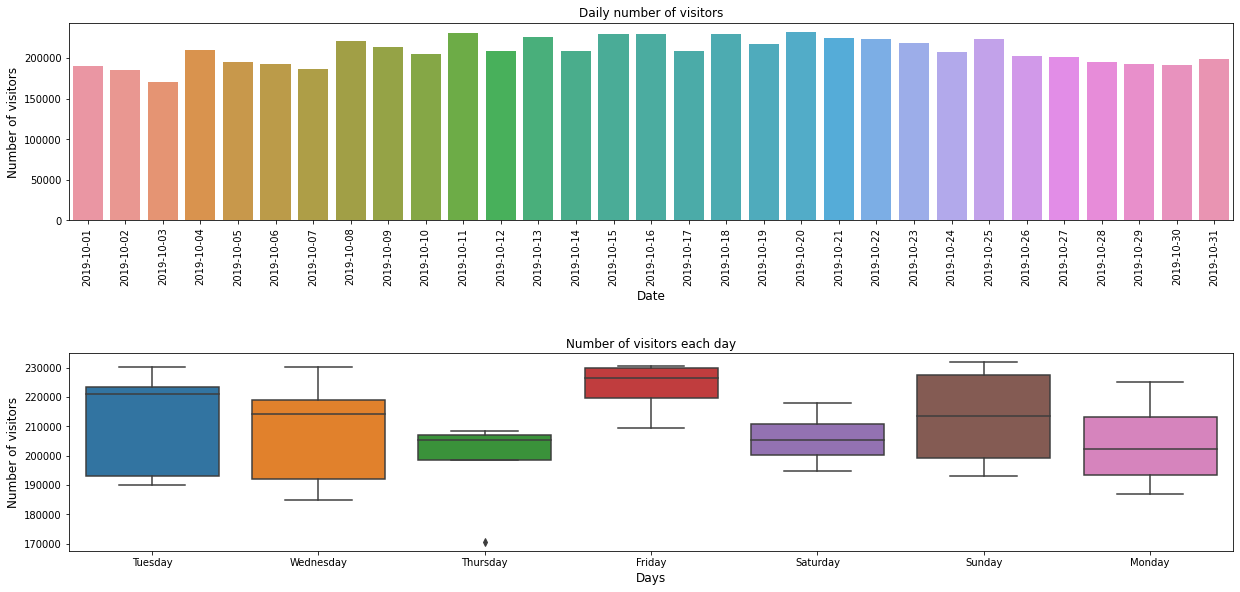

In [340]:
#Plot daily visitors

fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(2, 1, 1)
sns.barplot(x=daily_table['event_time'].dt.date, y='daily_visitors', data=daily_table, ax=ax1)
plt.xticks(rotation=90)
plt.title('Daily number of visitors',fontsize=12)
plt.ylabel('Number of visitors',fontsize=12)
plt.xlabel('Date',fontsize=12)

ax2 = fig.add_subplot(2, 1, 2)
sns.boxplot(x=daily_table['event_time'].dt.day_name(), y='daily_visitors', data=daily_table, ax=ax2)
plt.title('Number of visitors each day',fontsize=12)
plt.ylabel('Number of visitors',fontsize=12)
plt.xlabel('Days',fontsize=12)
fig.tight_layout(pad=3.5)

Number of sales each day

In [341]:
#Daily statistics for the sales

Stats = pd.DataFrame(daily_table.groupby(by=daily_table['event_time'].dt.day_name())['number_daily_sales'].describe())
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #to re-order the days 
Stats.reindex(days)

,count,mean,std,min,25%,50%,75%,max
event_time,,,,,,,,
Monday,4.00,"24,015.50","3,463.16","21,112.00","21,311.50","23,272.50","25,976.50","28,405.00"
Tuesday,5.00,"22,902.00","3,063.90","19,307.00","20,374.00","23,072.00","25,385.00","26,372.00"
Wednesday,5.00,"23,831.80","4,671.54","19,469.00","20,817.00","22,748.00","24,731.00","31,394.00"
Thursday,5.00,"22,732.80","3,618.60","19,255.00","20,099.00","21,993.00","23,999.00","28,318.00"
Friday,4.00,"25,761.00","1,318.70","23,929.00","25,369.75","26,037.00","26,428.25","27,041.00"
Saturday,4.00,"24,044.25","1,208.22","22,653.00","23,283.75","24,075.50","24,836.00","25,373.00"
Sunday,4.00,"25,058.25","3,232.77","22,171.00","23,095.00","24,250.50","26,213.75","29,561.00"


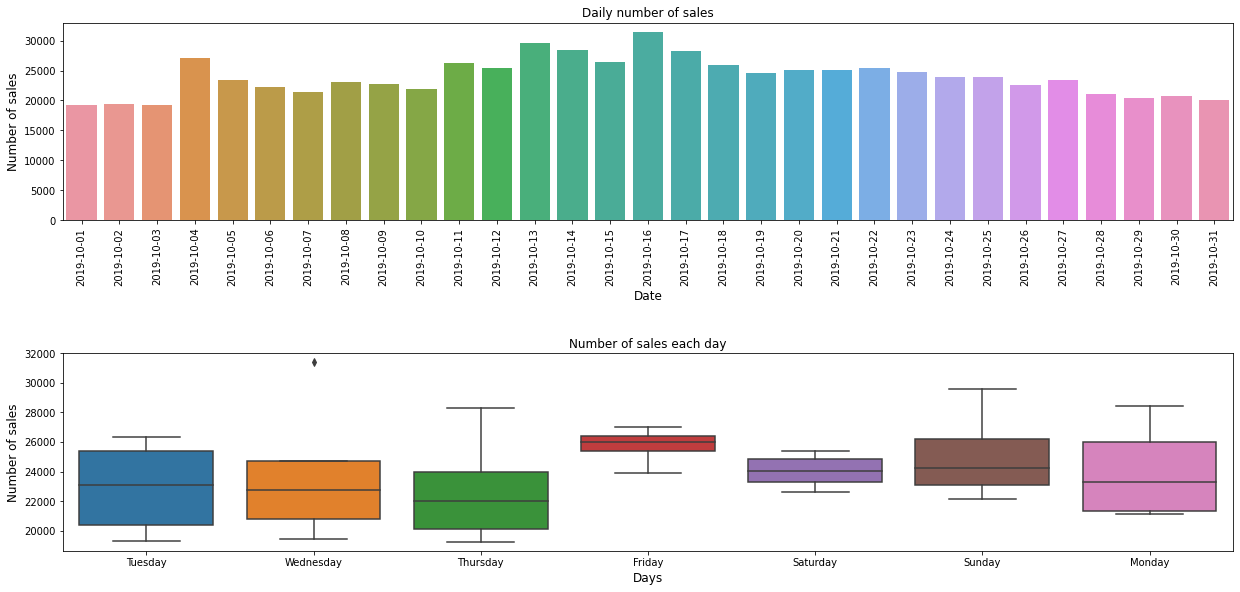

In [342]:
#Plot daily sales

fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(2, 1, 1)
sns.barplot(x=daily_table['event_time'].dt.date, y='number_daily_sales', data=daily_table, ax=ax1)
plt.xticks(rotation=90)
plt.title('Daily number of sales',fontsize=12)
plt.ylabel('Number of sales',fontsize=12)
plt.xlabel('Date',fontsize=12)

ax2 = fig.add_subplot(2, 1, 2)
sns.boxplot(x=daily_table['event_time'].dt.day_name(), y='number_daily_sales', data=daily_table, ax=ax2)
plt.title('Number of sales each day',fontsize=12)
plt.ylabel('Number of sales',fontsize=12)
plt.xlabel('Days',fontsize=12)
fig.tight_layout(pad=3.5)

Total earned each day

In [343]:
#Daily statistics for the total sales

Stats = pd.DataFrame(daily_table.groupby(by=daily_table['event_time'].dt.day_name())['total_daily_sales'].describe())
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #to re-order the days 
Stats.reindex(days)

,count,mean,std,min,25%,50%,75%,max
event_time,,,,,,,,
Monday,4.00,"7,539,810.99","1,381,315.12","6,348,189.06","6,530,843.44","7,227,181.62","8,236,149.16","9,356,691.65"
Tuesday,5.00,"7,219,398.61","1,025,462.09","6,275,964.01","6,433,438.43","6,819,832.28","7,914,693.04","8,653,065.29"
Wednesday,5.00,"7,413,163.99","1,400,503.96","6,213,628.53","6,634,069.51","6,855,511.13","7,615,371.54","9,747,239.24"
Thursday,5.00,"7,170,467.48","1,137,489.01","6,233,782.98","6,456,465.80","6,665,600.86","7,470,344.60","9,026,143.14"
Friday,4.00,"7,936,074.03","589,354.94","7,248,617.98","7,599,310.91","7,935,996.84","8,272,759.96","8,623,684.47"
Saturday,4.00,"7,282,342.67","268,120.21","6,917,602.84","7,210,169.39","7,324,644.24","7,396,817.52","7,562,479.36"
Sunday,4.00,"7,477,360.28","727,391.19","6,737,660.78","7,083,260.81","7,357,086.93","7,751,186.40","8,457,606.49"


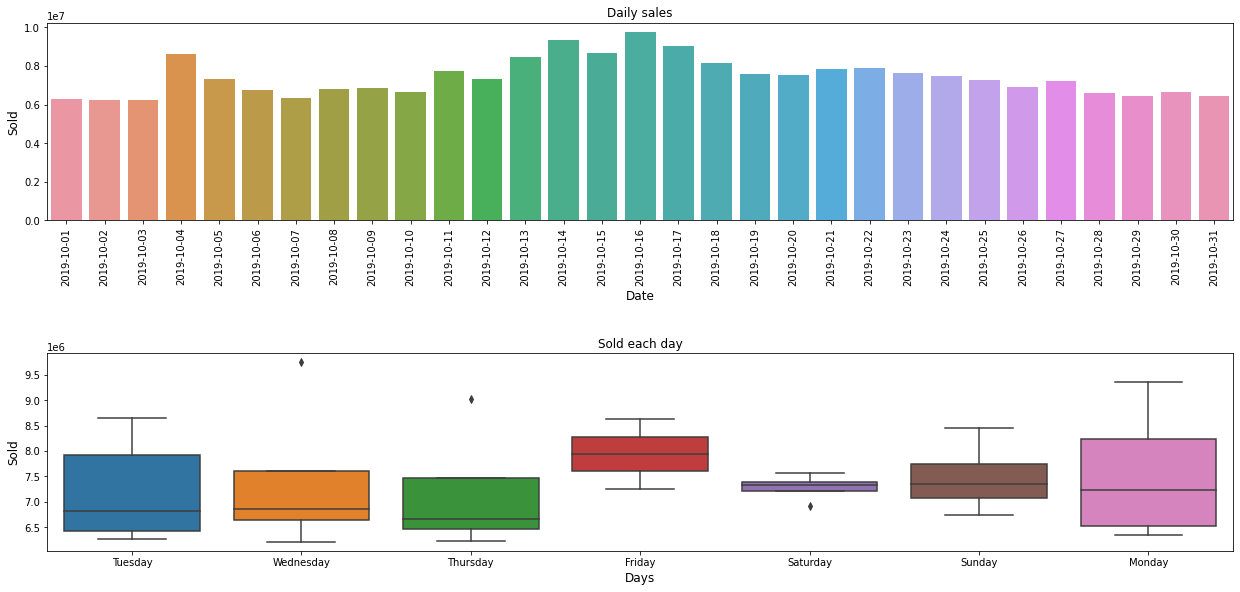

In [344]:
#Plot daily total sales

fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(2, 1, 1)
sns.barplot(x=daily_table['event_time'].dt.date, y='total_daily_sales', data=daily_table, ax=ax1)
plt.xticks(rotation=90)
plt.title('Daily sales',fontsize=12)
plt.ylabel('Sold',fontsize=12)
plt.xlabel('Date',fontsize=12)

ax2 = fig.add_subplot(2, 1, 2)
sns.boxplot(x=daily_table['event_time'].dt.day_name(), y='total_daily_sales', data=daily_table, ax=ax2)
plt.title('Sold each day',fontsize=12)
plt.ylabel('Sold',fontsize=12)
plt.xlabel('Days',fontsize=12)
fig.tight_layout(pad=3.5)

## Types of purchase



In [371]:
#Select users who made purchases
sales_filter = df['event_type'] == 'purchase'       #Consider only purchase events
clients_table = df.loc[sales_filter].groupby(
    by=['user_id']).agg(number_purchases=('user_id', 'count'),
    total_sales=('price', 'sum')).reset_index()

In [372]:
clients_table

,user_id,number_purchases,total_sales
0,33869381,0,0.00
1,64078358,0,0.00
2,183503497,0,0.00
3,184265397,0,0.00
4,195082191,0,0.00
...,...,...,...
3022285,566280663,0,0.00
3022286,566280676,0,0.00
3022287,566280697,0,0.00
3022288,566280780,0,0.00


In [373]:
#Select only clients who made at least one purchase
clients_who_purchased = clients_table.loc[clients_table.number_purchases>0,'user_id'].nunique()
print('{:,.0f} made at lest one purchase in October.'.format(clients_who_purchased))

#Select only clients who made more than one purchase
print('-' * 50)
more_than_one_purchase = clients_table.loc[clients_table.number_purchases>1,'user_id'].nunique()
print('{:,.0f} clients made more than one purchase in October'.format(more_than_one_purchase))

#Calculating percentage of clients who purchased 0,1...n items
print('-' * 50)
n=10
print('Clients distribution')
print(clients_table['number_purchases'].value_counts(normalize=True).head(n))

347,118 made at lest one purchase in October.
--------------------------------------------------
131,427 clients made more than one purchase in October
--------------------------------------------------
Clients distribution
0   0.89
1   0.07
2   0.02
3   0.01
4   0.00
5   0.00
6   0.00
7   0.00
8   0.00
9   0.00
Name: number_purchases, dtype: float64


In [348]:
#Exlude clients who made 0 purchase and re-calculate percentage as before
clients_table = clients_table.loc[clients_table.number_purchases>0]
print('-' * 50)
print('Clients distribution')
print(clients_table['number_purchases'].value_counts(normalize=True).head(n))
print('-' * 50)

--------------------------------------------------
Clients distribution
1    0.62
2    0.19
3    0.07
4    0.04
5    0.02
6    0.01
7    0.01
8    0.01
9    0.00
10   0.00
Name: number_purchases, dtype: float64
--------------------------------------------------


In [349]:
#filter out purchase anomalies (people who spend a lot and people who spend very few)
threshold = np.percentile(clients_table['total_sales'], [5, 95])
filter_threshold = np.logical_and(clients_table['total_sales'] >= threshold[0],
                                       clients_table['total_sales'] <= threshold[1])
filter_sales = clients_table.loc[filter_threshold]

In [350]:
filter_sales

,user_id,number_purchases,total_sales
56,264649825,2,"1,240.04"
144,303160429,1,340.59
266,340041246,4,915.52
430,371877401,1,29.89
583,384989212,1,41.44
...,...,...,...
3022020,566270177,1,75.94
3022094,566272569,2,254.84
3022135,566274637,1,"2,011.63"
3022195,566276996,1,74.39


In [351]:
# Compare statistics for all clients purchasing before and after anomalies filtering
print('Clients table')
print(clients_table.describe())

print('-' * 50)
print('Filtered clients table')
print(filter_sales.describe())
print('-' * 50)

Clients table
       number_purchases  total_sales
count        347,118.00   347,118.00
mean               2.14       662.48
std                3.64     2,074.37
min                1.00         0.88
25%                1.00       107.59
50%                1.00       246.52
75%                2.00       595.01
max              322.00   265,569.52
--------------------------------------------------
Filtered clients table
       number_purchases  total_sales
count        312,437.00   312,437.00
mean               1.75       419.01
std                1.56       454.73
min                1.00        28.51
25%                1.00       123.50
50%                1.00       246.52
75%                2.00       535.15
max               60.00     2,339.25
--------------------------------------------------


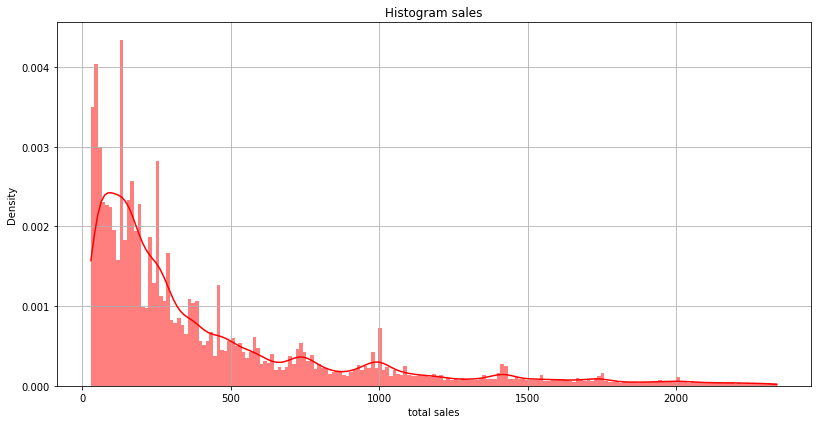

In [352]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 1, 2)
sns.histplot(filter_sales['total_sales'],ax=ax1, kde=True, stat="density", linewidth=0, color='red')
plt.grid()
plt.title('Histogram sales')
plt.ylabel('Density')
plt.xlabel('total sales')
fig.tight_layout(pad=3.0)

In [353]:
#Show best clients

#filter clients with purchase percentage higher than %10 of all clients
top_10 = np.percentile(clients_table['total_sales'],90)
filter_top_10 = clients_table['total_sales']>=top_10
table_top_10 = clients_table.loc[filter_top_10]
table_regular_clients = clients_table.loc[~filter_top_10]

#Statistics
print('Top 10% purchase clients')
print('-'*50)
print(table_top_10['total_sales'].describe())
print('-'*50)
total_sales_amount = clients_table['total_sales'].sum()
print('Total sales: {:,.0f}'.format(total_sales_amount))
total_sales_amount_top10 = table_top_10['total_sales'].sum()
print('Total sales top 10% clients: {:,.0f}'.format(total_sales_amount_top10))

#calculating descriptive statistics
print('Clienti regolari per totale vendite')
print('-'*50)
print(table_regular_clients['total_sales'].describe())
print('-'*50)
total_sales_amount_regular_clients = table_regular_clients['total_sales'].sum()
print('Total sales regular clients: {:,.0f}'.format(total_sales_amount_regular_clients))


Top 10% purchase clients
--------------------------------------------------
count    34,712.00
mean      3,735.44
std       5,625.45
min       1,418.31
25%       1,741.34
50%       2,339.25
75%       3,771.48
max     265,569.52
Name: total_sales, dtype: float64
--------------------------------------------------
Total sales: 229,957,502
Total sales top 10% clients: 129,664,534
Clienti regolari per totale vendite
--------------------------------------------------
count   312,406.00
mean        321.03
std         314.94
min           0.88
25%          94.21
50%         205.08
75%         442.68
max       1,418.25
Name: total_sales, dtype: float64
--------------------------------------------------
Total sales regular clients: 100,292,968


## Products Analysis


**Products categories**

In [354]:
# Performance of each category

table_categories = df.groupby(by=['category']).agg(number_events=('category', 'count'),
                                                         number_users=('user_id', lambda x: x.nunique()),
                                                         number_sessions=(
                                                         'user_session', pd.Series.nunique)).reset_index()
filter_sales = df['event_type'] == 'purchase'
table_category_sales = df.loc[filter_sales].groupby(by=['category']).agg(
    number_purchases=('category', 'count'),
    total_sales=('price', 'sum'),
    avg_sales=('price', 'mean'),
    sessions_with_purchases=('user_session', pd.Series.nunique),
    number_clients=('user_id', lambda x: x.nunique())).reset_index()
table_categories = pd.merge(left=table_categories,
                             right=table_category_sales,
                             left_on='category',
                             right_on='category',
                             how='left')
table_categories['conversion_percentage'] = table_categories['number_purchases'] / table_categories[
    'number_sessions']

In [355]:
table_categories

,category,number_events,number_users,number_sessions,number_purchases,total_sales,avg_sales,sessions_with_purchases,number_clients,conversion_percentage
0,accessories,238238,50753,68100,1587,"68,783.88",43.34,1481,1134,0.02
1,apparel,1542924,259014,381510,8002,"624,937.75",78.10,7233,5186,0.02
2,appliances,4967294,544317,1055909,74996,"13,583,121.92",181.12,67302,49280,0.07
3,auto,1013115,159148,264065,10620,"1,274,031.65",119.97,9748,7382,0.04
4,computers,2324217,248614,511185,27855,"11,378,874.65",408.50,24434,16200,0.05
5,construction,730834,101839,167363,7801,"932,995.02",119.60,7122,5353,0.05
6,country_yard,14089,4041,4917,72,"15,695.45",217.99,70,59,0.01
7,electronics,16135623,1683503,4226627,423028,"176,464,168.36",417.15,357464,200031,0.10
8,furniture,1247160,202653,333109,8301,"1,673,728.99",201.63,7594,5644,0.02
9,kids,520619,100077,156069,5482,"678,140.67",123.70,4977,3689,0.04


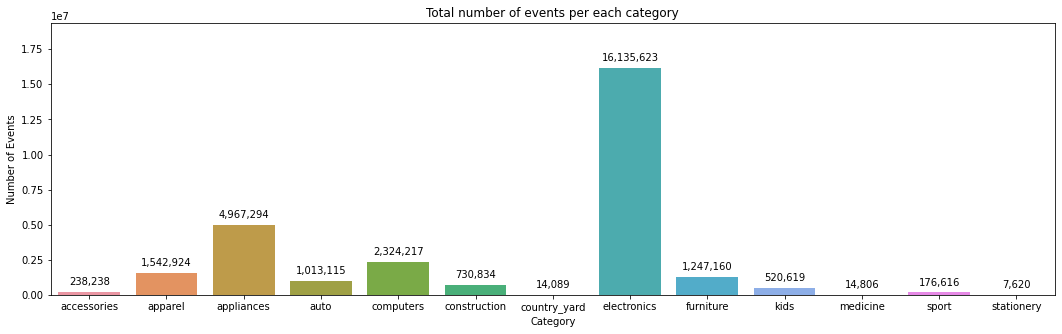

In [356]:
#Number of events generated by each category

plt.figure(figsize=(18,5))
plot = sns.barplot(x='category', y='number_events', data=table_categories)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ',.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Total number of events per each category')
plt.xlabel('Category')
plt.ylabel('Number of Events')
plt.ylim(0, table_categories['number_events'].max()*1.2);

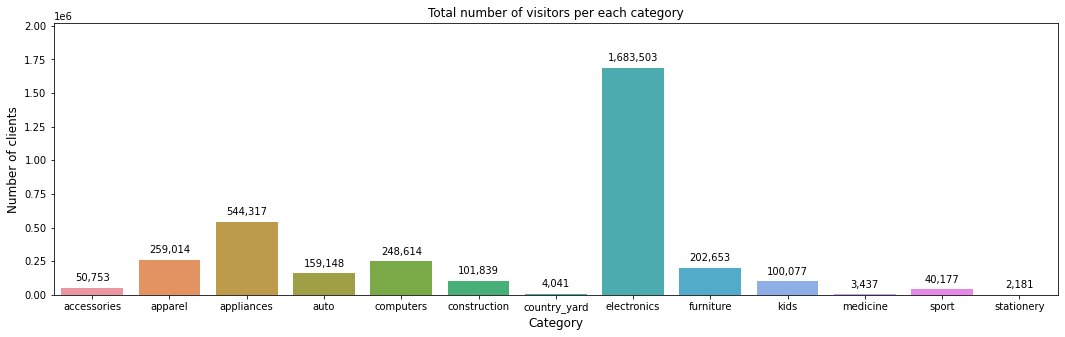

In [357]:
#Number of visitors per each category

plt.figure(figsize=(18,5))
plot = sns.barplot(x='category', y='number_users', data=table_categories)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ',.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')
plt.title('Total number of visitors per each category',fontsize=12)
plt.xlabel('Category',fontsize=12)
plt.ylabel('Number of clients',fontsize=12)
plt.ylim(0, table_categories['number_users'].max()*1.2);

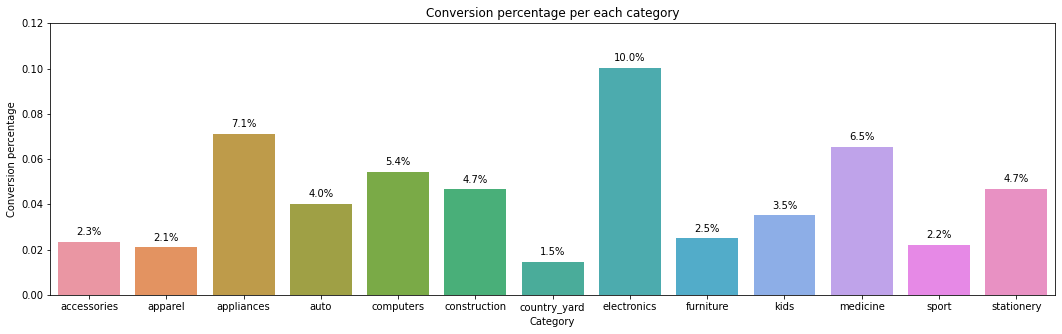

In [358]:
#Number of conversions per each category

plt.figure(figsize=(18,5))
plot = sns.barplot(x='category', y='conversion_percentage', data=table_categories)
for p in plot.patches:
    plot.annotate("{:.1%}".format(p.get_height()),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Conversion percentage per each category')
plt.xlabel('Category')
plt.ylabel('Conversion percentage')
plt.ylim(0, table_categories['conversion_percentage'].max() * 1.2)
plt.show()

In [359]:
# Performance of each sub-category

table_subcategories = df.groupby(by=['category','subcategory']).agg(number_events=('category', 'count'),
                                                         number_users=('user_id', lambda x: x.nunique()),
                                                         number_sessions=(
                                                         'user_session', pd.Series.nunique)).reset_index()
filter_sales = df['event_type'] == 'purchase'
table_subcategory_sales = df.loc[filter_sales].groupby(by=['category','subcategory']).agg(
    number_purchases=('category', 'count'),
    total_sales=('price', 'sum'),
    avg_sales=('price', 'mean'),
    sessions_with_purchases=('user_session', pd.Series.nunique),
    number_clients=('user_id', lambda x: x.nunique())).reset_index()
table_subcategories = pd.merge(left=table_subcategories,
                             right=table_subcategory_sales,
                             left_on=['category','subcategory'],
                             right_on=['category','subcategory'],
                             how='left')
table_subcategories['conversion_percentage'] = table_subcategories['number_purchases'] / table_subcategories[
    'number_sessions']

table_subcategories['category_subcategory'] = table_subcategories['category'] + '-' + table_subcategories['subcategory']

table_subcategories_sorted = table_subcategories.sort_values(by='number_events', ascending=False)

In [360]:
table_subcategories_sorted.head(10)

,category,subcategory,number_events,number_users,number_sessions,number_purchases,total_sales,avg_sales,sessions_with_purchases,number_clients,conversion_percentage,category_subcategory
38,electronics,smartphone,11507231,1300236,3099337,"338,018.00","157,049,623.37",464.62,"285,252.00","160,437.00",0.11,electronics-smartphone
21,appliances,kitchen,3317047,396749,733499,"48,124.00","10,533,873.02",218.89,"43,201.00","31,907.00",0.07,appliances-kitchen
35,electronics,audio,1574674,286092,498730,"35,592.00","4,151,606.02",116.64,"31,921.00","22,052.00",0.07,electronics-audio
37,electronics,clocks,1311033,211928,374029,"17,906.00","4,818,305.47",269.09,"15,998.00","10,746.00",0.05,electronics-clocks
11,apparel,shoes,1208383,183531,270742,"7,082.00","561,241.33",79.25,"6,420.00","4,593.00",0.03,apparel-shoes
18,appliances,environment,1147634,161934,260666,"18,074.00","2,320,568.47",128.39,"16,782.00","13,264.00",0.07,appliances-environment
28,computers,notebook,1137623,129214,245182,"15,590.00","8,979,887.25",576.00,"13,655.00","9,185.00",0.06,computers-notebook
41,electronics,video,1126904,172457,284368,"21,647.00","8,460,467.81",390.84,"19,292.00","13,533.00",0.08,electronics-video
24,auto,accessories,1013115,159148,264065,"10,620.00","1,274,031.65",119.97,"9,748.00","7,382.00",0.04,auto-accessories
31,construction,tools,705010,96815,159788,"7,504.00","918,092.07",122.35,"6,858.00","5,145.00",0.05,construction-tools


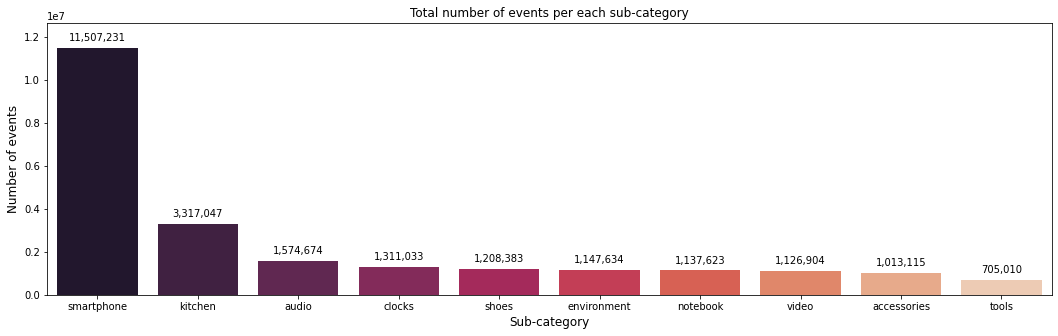

In [361]:
#Plot number of events per each sub-category

fig = plt.figure(figsize=(18,5))
plot = sns.barplot(x='subcategory', y='number_events', data=table_subcategories_sorted.head(10),palette="rocket")

for p in plot.patches:
    plot.annotate(format(p.get_height(), ',.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Total number of events per each sub-category',fontsize=12)
plt.ylabel('Number of events', fontsize=12)
plt.xlabel('Sub-category',fontsize=12)
plt.ylim(0, table_subcategories_sorted['number_events'].max() * 1.1);

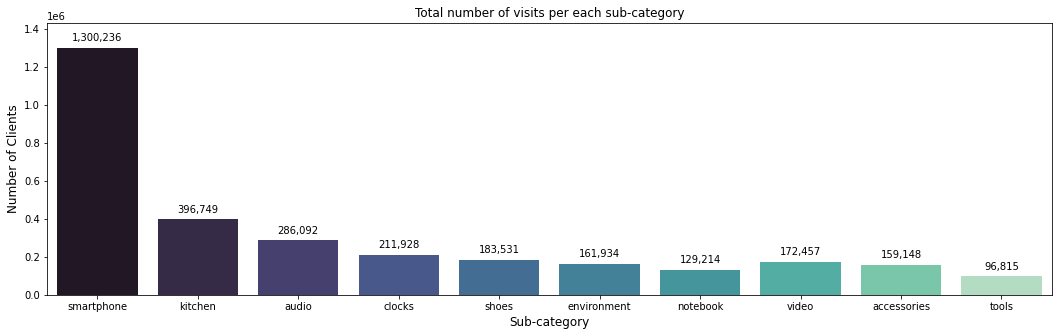

In [362]:
#Plot number of visits per each sub-category

fig = plt.figure(figsize=(18,5))
plot = sns.barplot(x='subcategory', y='number_users', data=table_subcategories_sorted.head(10),palette="mako")

for p in plot.patches:
    plot.annotate(format(p.get_height(), ',.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Total number of visits per each sub-category',fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.xlabel('Sub-category',fontsize=12)
plt.ylim(0, table_subcategories_sorted['number_users'].max() * 1.1);

Best conversion rates

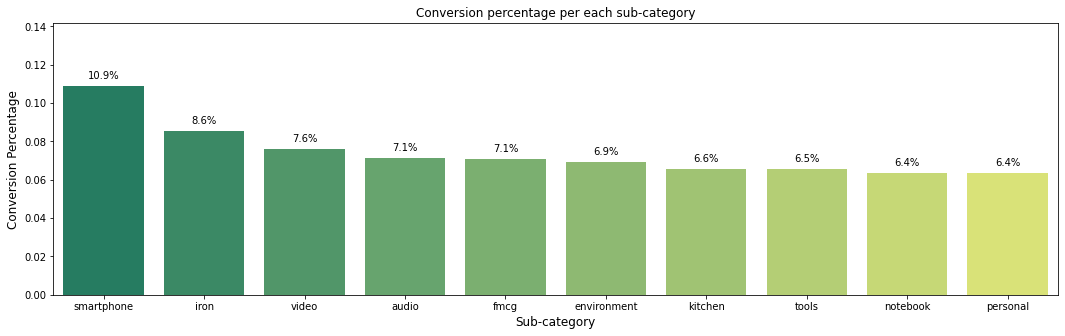

In [363]:
plt.figure(figsize=(18,5))
plot = sns.barplot(x='subcategory',y='conversion_percentage',
                   data=table_subcategories_sorted.sort_values(by='conversion_percentage',
                                                               ascending=False).head(10),palette='summer')

for p in plot.patches:
    plot.annotate("{:.1%}".format(p.get_height()),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Conversion percentage per each sub-category',fontsize=12)
plt.xlabel('Sub-category',fontsize=12)
plt.ylabel('Conversion Percentage',fontsize=12)
plt.ylim(0,table_subcategories_sorted['conversion_percentage'].max()*1.3);

Worst conversion rates

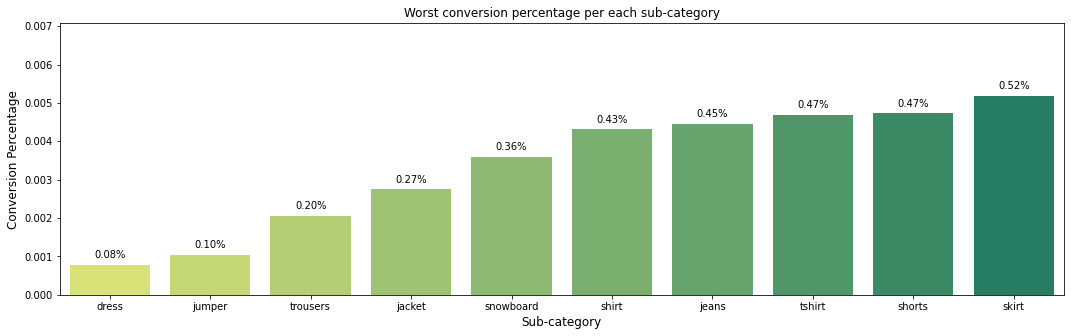

In [364]:
plt.figure(figsize=(18,5))
plot = sns.barplot(x='subcategory',y='conversion_percentage',
                   data=table_subcategories_sorted.sort_values(by='conversion_percentage',
                                                               ascending=True).head(10),palette='summer_r')

for p in plot.patches:
    plot.annotate("{:.2%}".format(p.get_height()),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.title('Worst conversion percentage per each sub-category',fontsize=12)
plt.xlabel('Sub-category',fontsize=12)
plt.ylabel('Conversion Percentage',fontsize=12)

plt.ylim(0,plot.get_ybound()[1]*1.3);

In [365]:
#Free memory
del daily_table
del sales_filter
del table_categories
del clients_table
del table_subcategory_sales
del table_subcategories
del table_subcategories_sorted
del total_sales_amount_top10
del table_regular_clients

**Most visited brands**

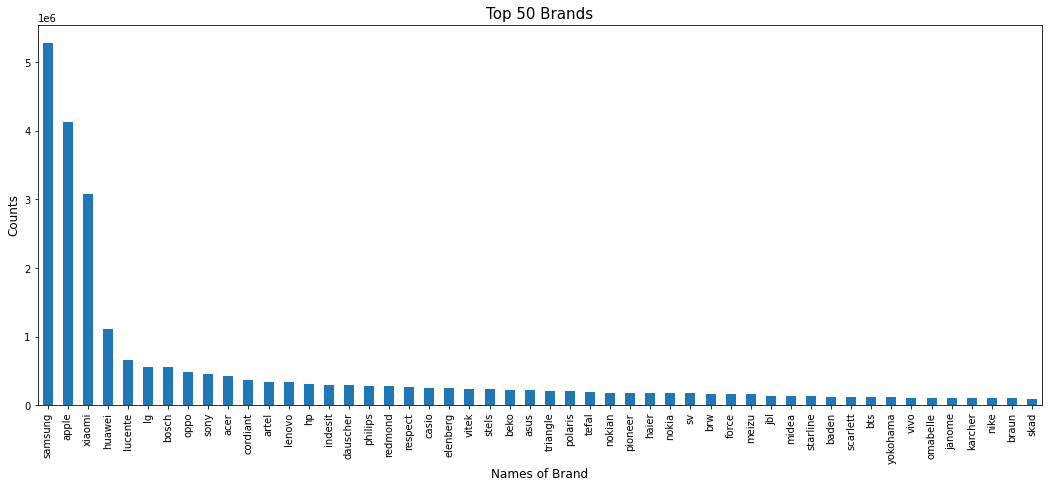

In [366]:
top_brands = df['brand'].value_counts().head(50)
                                             
plt.figure(figsize=(18,7))
plt.bar(top_brands.index,top_brands.values, width=0.5)
plt.xticks(rotation=90);
plt.margins(x=0.005)
plt.title('Top 50 Brands', fontsize = 15)
plt.xlabel('Names of Brand',fontsize=12)
plt.ylabel('Counts',fontsize=12);

**Most purchased items**

In [367]:
purchase = df.loc[df['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase_product=purchase.groupby('product_id')['product_id'].agg(['count']).sort_values('count', ascending=False)

print(purchase_product.head())

            count
product_id       
1004856     28944
1004767     21806
1004833     12697
1005115     12543
4804056     12381


**Most purchased brands**

In [368]:
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,171706
apple,142577
xiaomi,46595
huawei,23294
oppo,10891
lg,7831
acer,6882
elenberg,5435
indesit,5023


In [369]:
#Free memory
del purchase
del purchase_product
del top_sellers